In [4]:
import pandas as pd

train_data=pd.read_csv(r"C:\Users\ehsaa\OneDrive\Desktop\Projects\Titanic\train.csv")
test_data=pd.read_csv(r"C:\Users\ehsaa\OneDrive\Desktop\Projects\Titanic\test.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

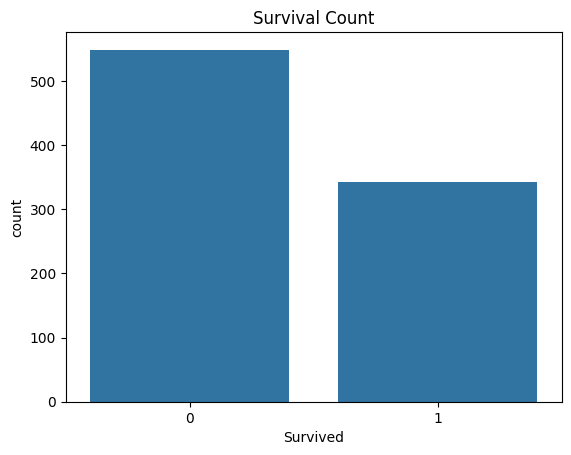

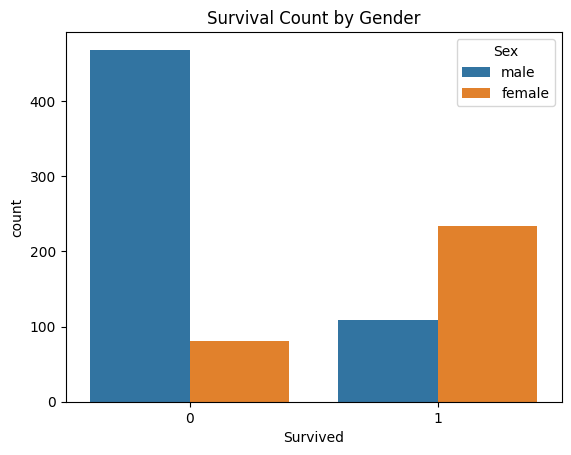

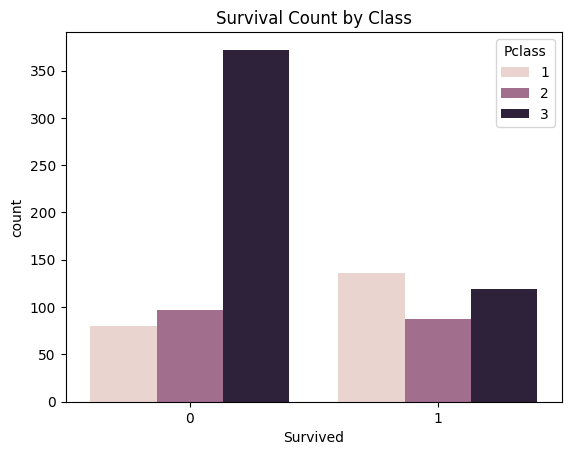

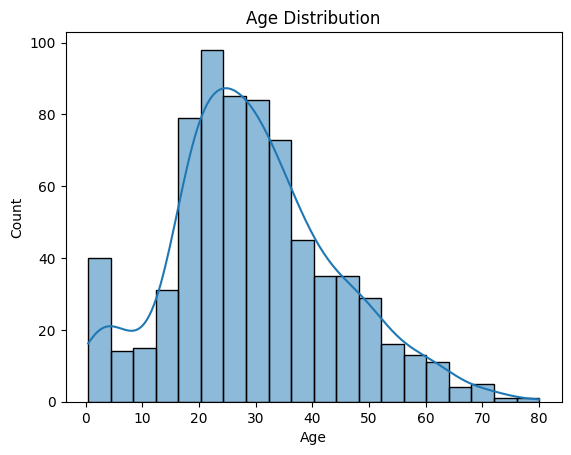

In [13]:
#Plots

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Survived", data=train_data)
plt.title("Survival Count")
plt.show()

sns.countplot(x="Survived",hue="Sex", data=train_data)
plt.title("Survival Count by Gender")
plt.show()

sns.countplot(x="Survived", hue="Pclass", data=train_data)
plt.title("Survival Count by Class")
plt.show()

sns.histplot(train_data["Age"].dropna(),kde=True)
plt.title("Age Distribution")
plt.show()

In [20]:
#Filling Missing Values in Train_data and Test_data

train_data["Age"].fillna(train_data["Age"].median())
test_data["Age"].fillna(test_data["Age"].median())

train_data["Embarked"].fillna(train_data["Embarked"].mode())
test_data["Embarked"].fillna(test_data["Embarked"].mode())

test_data["Fare"].fillna(test_data["Fare"].median())

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#Encoding categorical values

train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_data=pd.get_dummies(test_data,columns=["Sex","Embarked","Pclass"],drop_first=True)

In [24]:
#Drop columns

train_data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
test_data.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [28]:
#Separate features and Target variables

X_train=train_data.drop("Survived",axis=1)
Y_train=train_data["Survived"]

#Using test data for prediction
X_test=test_data.copy()

print(X_train.head())
print(Y_train.head())
print(X_test.head())

   PassengerId   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0            1  22.0      1      0   7.2500      True       False        True   
1            2  38.0      1      0  71.2833     False       False       False   
2            3  26.0      0      0   7.9250     False       False        True   
3            4  35.0      1      0  53.1000     False       False        True   
4            5  35.0      0      0   8.0500      True       False        True   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True  
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   PassengerId   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0          892  34.5      0      0   7.8292      True        True       False   
1          893  47.0      1      0   7.0000     False       False        True   
2          894  62.0      0      0   9.6875      True        T

In [29]:
#Model selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and validation sets
X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [30]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, Y_train_split)

LogisticRegression(max_iter=1000)

In [31]:
# Make predictions on the validation set
Y_val_pred = model.predict(X_val_split)

# Evaluate the model
accuracy = accuracy_score(Y_val_split, Y_val_pred)
conf_matrix = confusion_matrix(Y_val_split, Y_val_pred)
class_report = classification_report(Y_val_split, Y_val_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7932960893854749
Confusion Matrix:
[[89 16]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [32]:
#Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

tree_model=DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_split,Y_train_split)

# Make predictions and evaluate
Y_val_pred_tree = tree_model.predict(X_val_split)
tree_accuracy = accuracy_score(Y_val_split, Y_val_pred_tree)
print(f'Decision Tree Accuracy: {tree_accuracy}')

Decision Tree Accuracy: 0.7653631284916201


In [33]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train_split,Y_train_split)

#Predictions

Y_val_pred_rf=rf_model.predict(X_val_split)
rf_accuracy=accuracy_score(Y_val_split,Y_val_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')

Random Forest Accuracy: 0.8379888268156425


In [45]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_split,Y_train_split)

#Predictions

Y_val_pred_gb=gb_model.predict(X_val_split)
gb_accuracy=accuracy_score(Y_val_split,Y_val_pred_gb)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

Gradient Boosting Accuracy: 0.8212290502793296


In [44]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(tree_model, X_train, Y_train, cv=10)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

Cross-Validation Scores: [0.58888889 0.75280899 0.70786517 0.60674157 0.70786517 0.61797753
 0.80898876 0.7752809  0.78651685 0.80898876]
Mean Cross-Validation Score: 0.7161922596754057


In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_split, Y_train_split)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Score: {best_score}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.828612232837585


In [49]:
# Train the final model on the entire training dataset with the best parameters

final_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100, random_state=42)
final_model.fit(X_train, Y_train)

# Make predictions on the test set
Y_test_pred = final_model.predict(X_test)

# Save the predictions to a CSV file
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': Y_test_pred})
submission.to_csv('titanic_predictions.csv', index=False)

In [51]:
Y_val_final_pred = final_model.predict(X_val_split)

accuracy = accuracy_score(Y_val_split, Y_val_final_pred)
conf_matrix = confusion_matrix(Y_val_split, Y_val_final_pred)
class_report = classification_report(Y_val_split, Y_val_final_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.9106145251396648
Confusion Matrix:
[[100   5]
 [ 11  63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       105
           1       0.93      0.85      0.89        74

    accuracy                           0.91       179
   macro avg       0.91      0.90      0.91       179
weighted avg       0.91      0.91      0.91       179



In [62]:
# Make predictions on the test set
Y_test_pred = final_model.predict(X_test)

# Save the predictions to a CSV file
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': Y_test_pred})
submission.to_csv(r'C:\Users\ehsaa\OneDrive\Desktop\Projects\Titanic\titanic_predictions.csv', index=False, encoding="utf-8")

In [63]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
